In [1]:
# Import required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
one_hot_data =  pd.get_dummies(data)
one_hot_data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


In [4]:
one_hot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_female        1338 non-null   bool   
 5   sex_male          1338 non-null   bool   
 6   smoker_no         1338 non-null   bool   
 7   smoker_yes        1338 non-null   bool   
 8   region_northeast  1338 non-null   bool   
 9   region_northwest  1338 non-null   bool   
 10  region_southeast  1338 non-null   bool   
 11  region_southwest  1338 non-null   bool   
dtypes: bool(8), float64(2), int64(2)
memory usage: 52.4 KB


In [5]:
x = one_hot_data.drop(columns=('charges'))
y = one_hot_data['charges']
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

In [6]:
# Build a neural network (sort of like model_2_above)
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)


# 3. Fit the Model
model_1.fit(x_train , y_train , epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 10151.8057 - mae: 10151.8057
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 7735.4531 - mae: 7735.4531
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 7328.0571 - mae: 7328.0571
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 7458.9058 - mae: 7458.9058
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 7382.8726 - mae: 7382.8726
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - loss: 7461.8335 - mae: 7461.8335
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: 7358.7266 - mae: 7358.7266
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 7572.5762 - mae: 7572.5762
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 7478.8682 - mae: 7478.8682 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 7378.9116 - mae: 7378.9116
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 7354.1177 - mae: 7354.1177
Epoch 12/100
34/34 ━━━━━━━━

In [7]:
model_1.evaluate(x_test , y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 7930.0908 - mae: 7930.0908  


[7888.7548828125, 7888.7548828125]

In [8]:
y_train.median() , y_train.mean()

(9575.4421, 13346.089736364485)

# now look with more layers and neurons


In [9]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), 
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. Fit the model
model_2.fit(x_train , y_train , epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: nan - mae: nan            
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: nan - mae: nan
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: nan - mae: nan
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - loss: nan - mae: nan
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: nan - mae: nan
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - loss: nan - mae: nan
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - loss: nan - mae: nan
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: nan - mae: nan
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: nan - mae: nan
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - loss: nan - mae: nan
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: nan - mae: nan
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: nan - mae: nan
Epoch 13/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: nan - mae: 

In [10]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), 
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# 3. Fit the model
model_2.fit(x_train , y_train , epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - loss: 13256.1855 - mae: 13256.1855
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 13100.5547 - mae: 13100.5547
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 12749.3086 - mae: 12749.3086
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - loss: 12020.8564 - mae: 12020.8564
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 10861.6973 - mae: 10861.6973
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 9404.4473 - mae: 9404.4473
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 8085.9976 - mae: 8085.9976
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 7467.9858 - mae: 7467.9858
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - loss: 7400.1021 - mae: 7400.1021
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 7352.1470 - mae: 7352.1470
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - loss: 7330.2998 - mae: 7330.2998
Epoch 12/100
34/34 ━

In [11]:
model_2.evaluate(x_test , y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 4824.3286 - mae: 4824.3286


[4689.8232421875, 4689.8232421875]

In [12]:
# set random seed
tf.random.set_seed(42)

# 1.Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1) 
])

# Compile the model
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# Fit the model
history = model_3.fit(x_train , y_train , epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - loss: 13279.1621 - mae: 13279.1621
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - loss: 13175.6611 - mae: 13175.6611
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 12950.7461 - mae: 12950.7461
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 12463.6162 - mae: 12463.6162
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 11553.5088 - mae: 11553.5088
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 10211.7764 - mae: 10211.7764
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 8719.1406 - mae: 8719.1406
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 7672.3267 - mae: 7672.3267
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - loss: 7412.4185 - mae: 7412.4185
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 7374.3242 - mae: 7374.3242
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 7354.4565 - mae: 7354.4565
Epoch 12/200
34/34

In [13]:
model_3.evaluate(x_test , y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - loss: 3480.3154 - mae: 3480.3154


[3414.476806640625, 3414.476806640625]

Text(0.5, 0, 'epochs')

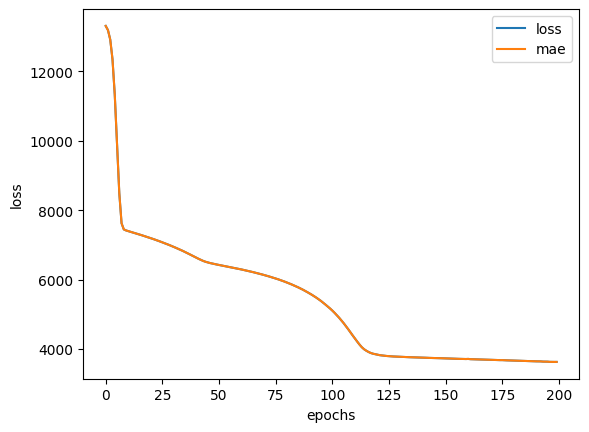

In [14]:
# Plot history (also Known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

# Prepocessing data (Normalization and Standardization)
## In terms of scaling calues, neural newtworks tend to prefer normalization

In [15]:
insurance = pd.read_csv('insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [21]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler() , ['age' , 'bmi' , 'children']), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown='ignore') , ['sex' , 'smoker' , 'region'])
)

# Create X and Y
X = insurance.drop('charges' , axis=1)
Y =  insurance['charges']

# Build oyr train and test data
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2 , random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
x_train_normal = ct.transform(X_train)
x_test_normal = ct.transform(X_test)


In [22]:
# what does our data lokk like now
X_train.loc[0]


age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [28]:
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [30]:
X_train.shape , x_train_normal.shape

((1070, 6), (1070, 11))

In [33]:
# Bulid a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# 3. Fit the model
history = insurance_model_4.fit(x_train_normal , Y_train , epochs=100)


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - loss: 13297.6895 - mae: 13297.6895
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - loss: 13290.9736 - mae: 13290.9736
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 13273.1152 - mae: 13273.1152
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 13267.3467 - mae: 13267.3467
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 13160.5039 - mae: 13160.5039
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13043.6436 - mae: 13043.6436
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 12900.5205 - mae: 12900.5205
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 12636.2500 - mae: 12636.2500
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - loss: 12325.9453 - mae: 12325.9453
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 11934.1055 - mae: 11934.1055
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 72us/step - loss: 11468.3555 - mae: 11468.3555 
Epoch 12/1

In [34]:
# Evalaute our insurance model trained on normalized data
insurance_model_4.evaluate(x_test_normal , Y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - loss: 3518.8608 - mae: 3518.8608


[3432.61328125, 3432.61328125]

Text(0.5, 0, 'epochs')

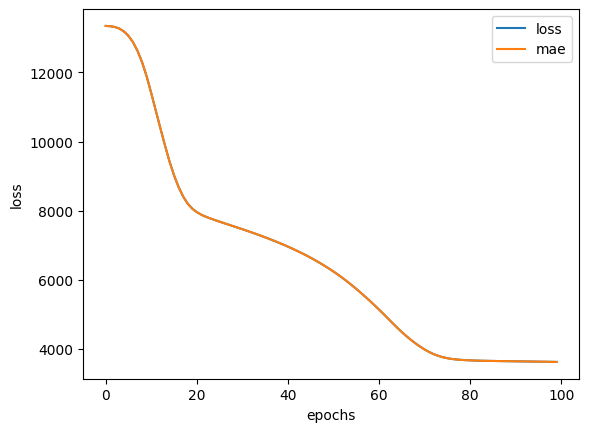

In [35]:
# Plot history (also Known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')